# IMPORTING PACKAGES

In [122]:
import numpy as np        # Fundamental package for linear algebra and multidimensional arrays
import pandas as pd       # Data analysis and manipultion tool

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, classification_report

# READING AND ANALYZING THE DATA

In [124]:
trainandval_data = pd.read_csv("iitm_train_data.csv")
test_data = pd.read_csv("iitm_test_data.csv")

In [125]:
trainandval_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,class
count,46807.000000,4.680700e+04,4.680700e+04,46807.000000,4.680700e+04,4.680700e+04,46807.000000,46807.000000,46807.000000,46807.000000,...,46807.000000,46807.000000,46807.000000,46807.000000,46807.000000,46807.000000,46807.000000,46807.000000,46807.000000,46807.000000
mean,-0.000003,1.415116e-06,9.925226e-07,-0.000001,1.207948e-06,-7.075103e-07,0.001882,0.001881,0.001880,-0.011906,...,-0.337555,7.300926,8.271516,-1.500881,-1.500905,-1.500799,-1.497778,-1.497800,-1.497692,6.014357
std,0.000080,5.869695e-05,2.372014e-04,0.000070,6.013258e-05,2.278823e-04,0.036524,0.036521,0.036526,0.066422,...,27.964812,12.600663,6.583845,0.003661,0.003671,0.003635,0.003176,0.003176,0.003187,3.156842
min,-0.013721,-5.414400e-03,-1.358000e-02,-0.012787,-8.355900e-03,-9.741300e-03,-0.139890,-0.135940,-0.130860,-0.218640,...,-0.902350,-0.596830,0.320660,-1.525500,-1.526200,-1.523700,-1.521400,-1.523200,-1.521300,1.000000
25%,-0.000007,-1.442100e-05,-7.270050e-05,-0.000005,-1.499750e-05,-7.455400e-05,-0.019870,-0.019911,-0.019888,-0.032113,...,-0.715590,1.452650,4.437100,-1.503300,-1.503400,-1.503200,-1.499600,-1.499600,-1.499600,3.000000
50%,-0.000003,8.966400e-07,4.999900e-07,-0.000001,6.887400e-07,-3.926500e-07,0.013179,0.013185,0.013200,-0.015464,...,-0.661920,3.310100,6.463100,-1.500300,-1.500300,-1.500300,-1.498100,-1.498100,-1.498000,6.000000
75%,0.000002,1.884650e-05,7.459750e-05,0.000004,1.886350e-05,7.077650e-05,0.024758,0.024764,0.024766,0.020449,...,-0.573910,8.289450,9.861250,-1.498200,-1.498200,-1.498200,-1.496200,-1.496300,-1.496200,9.000000
max,0.005784,4.525300e-03,3.330400e-03,0.001453,8.245100e-04,2.753600e-03,0.069125,0.069130,0.069131,0.352580,...,3670.800000,889.930000,153.150000,-1.457600,-1.456100,-1.455500,-1.337200,-1.337200,-1.337100,11.000000


# CHECKING DISTRIBUTION OF OUTPUT CLASS

<AxesSubplot:>

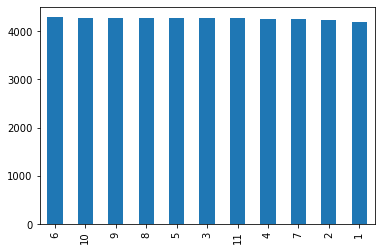

In [126]:
trainandval_data['class'].value_counts().plot(kind = 'bar')

# PLOTTING CORRELATION MATRIX TO FIND CORRELATIONS

In [127]:
corr = trainandval_data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,class
0,1.00,0.61,0.30,0.27,0.10,0.11,0.05,0.05,0.05,0.02,0.02,0.02,-0.55,-0.36,-0.20,-0.18,-0.09,-0.06,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,0.38,0.08,0.05,0.26,0.01,0.03,-0.03,-0.02,-0.02,0.12,0.12,0.12,-0.01,-0.03,-0.03,-0.40,-0.27,-0.09,-0.03,-0.04,-0.05,-0.23,-0.23,-0.23,-0.01
1,0.61,1.00,0.21,0.28,0.20,0.12,0.04,0.04,0.04,0.04,0.04,0.04,-0.24,-0.16,-0.07,-0.19,-0.08,-0.05,-0.04,-0.04,-0.04,-0.04,-0.04,-0.04,0.40,0.44,0.05,0.19,0.05,0.02,0.00,0.01,0.01,0.10,0.10,0.10,-0.04,-0.02,-0.02,-0.03,-0.11,-0.04,-0.04,-0.05,-0.05,-0.11,-0.11,-0.11,-0.09
2,0.30,0.21,1.00,0.08,0.08,0.04,-0.01,-0.01,-0.02,-0.01,-0.01,-0.01,-0.18,-0.12,-0.06,-0.05,-0.03,-0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.04,0.55,0.05,0.02,0.01,-0.02,-0.01,-0.02,0.09,0.09,0.09,-0.01,-0.01,-0.02,-0.17,-0.09,-0.03,-0.02,-0.02,-0.03,-0.08,-0.08,-0.08,-0.03
3,0.27,0.28,0.08,1.00,0.64,0.28,-0.01,-0.01,-0.02,0.01,0.01,0.01,-0.16,-0.20,-0.06,-0.57,-0.44,-0.19,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.08,0.03,0.38,0.07,0.04,-0.03,-0.03,-0.02,-0.06,-0.05,-0.05,-0.03,-0.06,-0.07,-0.01,-0.03,-0.03,-0.07,-0.07,-0.07,-0.07,-0.08,-0.08,0.01
4,0.10,0.20,0.08,0.64,1.00,0.20,0.01,0.01,0.01,0.04,0.04,0.04,-0.10,-0.16,-0.06,-0.41,-0.41,-0.16,-0.04,-0.04,-0.04,-0.04,-0.04,-0.04,0.05,0.06,0.02,-0.04,0.39,0.02,-0.08,-0.08,-0.07,0.09,0.09,0.09,-0.31,-0.09,-0.11,-0.22,-0.04,-0.07,-0.06,-0.06,-0.06,-0.07,-0.08,-0.08,-0.11
5,0.11,0.12,0.04,0.28,0.20,1.00,-0.00,-0.00,-0.01,0.01,0.01,0.01,-0.06,-0.06,-0.01,-0.15,-0.09,-0.03,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,0.14,0.03,0.02,0.14,0.04,0.56,-0.05,-0.04,-0.04,-0.00,0.00,-0.00,0.04,-0.01,-0.00,0.05,-0.01,-0.00,-0.01,-0.01,-0.01,-0.04,-0.04,-0.04,-0.04
6,0.05,0.04,-0.01,-0.01,0.01,-0.00,1.00,1.00,1.00,0.80,0.80,0.80,-0.03,-0.02,-0.03,-0.02,-0.01,-0.00,0.01,0.01,0.01,0.01,0.01,0.01,-0.01,0.03,0.01,0.00,-0.00,-0.02,0.16,0.16,0.16,0.39,0.39,0.39,-0.01,-0.00,-0.00,-0.01,0.00,0.01,-0.08,-0.08,-0.08,-0.00,-0.00,-0.00,-0.41
7,0.05,0.04,-0.01,-0.01,0.01,-0.00,1.00,1.00,1.00,0.80,0.80,0.80,-0.03,-0.02,-0.03,-0.02,-0.01,-0.00,0.01,0.01,0.01,0.01,0.01,0.01,-0.01,0.03,0.01,0.00,-0.00,-0.02,0.16,0.16,0.16,0.39,0.39,0.39,-0.01,-0.00,-0.00,-0.01,0.00,0.01,-0.08,-0.08,-0.08,-0.00,-0.00,-0.00,-0.41
8,0.05,0.04,-0.02,-0.02,0.01,-0.01,1.00,1.00,1.00,0.80,0.80,0.80,-0.02,-0.02,-0.03,-0.01,-0.01,-0.00,0.01,0.01,0.01,0.01,0.01,0.01,-0.01,0.03,0.00,0.00,-0.00,-0.02,0.16,0.16,0.16,0.39,0.39,0.39,-0.01,-0.00,-0.00,-0.01,0.00,0.01,-0.08,-0.08,-0.08,-0.00,-0.00,-0.00,-0.41
9,0.02,0.04,-0.01,0.01,0.04,0.01,0.80,0.80,0.80,1.00,1.00,1.00,0.02,0.01,0.00,0.00,-0.00,-0.00,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,-0.01,0.03,0.01,0.00,0.00,-0.01,0.17,0.17,0.17,0.49,0.49,0.49,0.01,-0.03,-0.02,0.01,-0.02,-0.01,-0.09,-0.09,-0.09,-0.02,-0.02,-0.02,-0.34


# TRAIN VAL SPLIT ACC TO QUESTION - 90:10 with random state = 1

In [128]:
train_data,val_data = train_test_split(trainandval_data,test_size = 0.1, random_state = 1)

In [129]:
cols = train_data.drop(train_data.columns[[-1]], axis =1).columns
X_train = train_data[cols]
y_train = train_data['class']
X_val = val_data[cols]
y_val = val_data['class']
X_test = test_data[cols]

# MULTICLASS LOGISTIC SOFTMAX REGRESION MODEL -1

In [130]:
log_model = LogisticRegression()

In [131]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [132]:
y_train_pred = log_model.predict(X_train)

In [133]:
y_val_pred = log_model.predict(X_val)

# CONFUSION MATRIX FOR THE VALIDATION SET

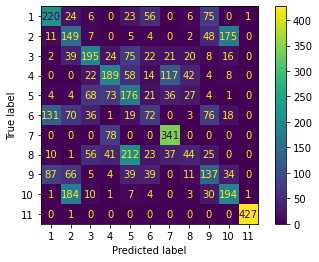

In [134]:
plot_confusion_matrix( log_model, X_val, y_val)

# METRICS FOR TRAINING SET

In [152]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           1       0.47      0.55      0.51      3770
           2       0.32      0.39      0.35      3821
           3       0.46      0.45      0.45      3841
           4       0.44      0.39      0.41      3800
           5       0.31      0.44      0.37      3850
           6       0.23      0.14      0.17      3864
           7       0.63      0.82      0.71      3828
           8       0.33      0.12      0.17      3826
           9       0.30      0.31      0.30      3853
          10       0.44      0.45      0.45      3841
          11       1.00      1.00      1.00      3832

    accuracy                           0.46     42126
   macro avg       0.45      0.46      0.45     42126
weighted avg       0.45      0.46      0.45     42126



# METRICS FOR VALIDATION SET

## For class 11: f1 score = precision = recall = 1
## Metric used to evaluate - Accuracy
## Reason - All classes are almost evenly distributed, so there is no imbalance and hence, accuracy will be a good enough indicator.

In [136]:
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           1       0.47      0.54      0.50       411
           2       0.28      0.37      0.32       401
           3       0.48      0.46      0.47       422
           4       0.46      0.42      0.44       454
           5       0.29      0.43      0.34       414
           6       0.28      0.17      0.21       426
           7       0.62      0.81      0.70       419
           8       0.28      0.10      0.14       449
           9       0.34      0.32      0.33       422
          10       0.43      0.45      0.44       435
          11       1.00      1.00      1.00       428

    accuracy                           0.46      4681
   macro avg       0.45      0.46      0.45      4681
weighted avg       0.45      0.46      0.44      4681



# REMOVING HIGHLY CORRELATED FEATURES AS THEY ARE REDUNDANT

In [137]:
trainval_cor_rm = trainandval_data.drop(trainandval_data.columns[[7,8,10,11,13,16,19,20,21,22,23,31,32,34,35,43,44,46,47]],axis = 1)
test_cor_rm = test_data.drop(test_data.columns[[7,8,10,11,13,16,19,20,21,22,23,31,32,34,35,43,44,46,47]],axis = 1)

In [138]:
corr = trainval_cor_rm.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,0,1,2,3,4,5,6,9,12,14,15,17,18,24,25,26,27,28,29,30,33,36,37,38,39,40,41,42,45,class
0,1.00,0.61,0.30,0.27,0.10,0.11,0.05,0.02,-0.55,-0.20,-0.18,-0.06,-0.01,0.38,0.08,0.05,0.26,0.01,0.03,-0.03,0.12,-0.01,-0.03,-0.03,-0.40,-0.27,-0.09,-0.03,-0.23,-0.01
1,0.61,1.00,0.21,0.28,0.20,0.12,0.04,0.04,-0.24,-0.07,-0.19,-0.05,-0.04,0.40,0.44,0.05,0.19,0.05,0.02,0.00,0.10,-0.04,-0.02,-0.02,-0.03,-0.11,-0.04,-0.04,-0.11,-0.09
2,0.30,0.21,1.00,0.08,0.08,0.04,-0.01,-0.01,-0.18,-0.06,-0.05,-0.02,0.00,0.07,0.04,0.55,0.05,0.02,0.01,-0.02,0.09,-0.01,-0.01,-0.02,-0.17,-0.09,-0.03,-0.02,-0.08,-0.03
3,0.27,0.28,0.08,1.00,0.64,0.28,-0.01,0.01,-0.16,-0.06,-0.57,-0.19,0.00,0.39,0.08,0.03,0.38,0.07,0.04,-0.03,-0.06,-0.03,-0.06,-0.07,-0.01,-0.03,-0.03,-0.07,-0.07,0.01
4,0.10,0.20,0.08,0.64,1.00,0.20,0.01,0.04,-0.10,-0.06,-0.41,-0.16,-0.04,0.05,0.06,0.02,-0.04,0.39,0.02,-0.08,0.09,-0.31,-0.09,-0.11,-0.22,-0.04,-0.07,-0.06,-0.07,-0.11
5,0.11,0.12,0.04,0.28,0.20,1.00,-0.00,0.01,-0.06,-0.01,-0.15,-0.03,-0.01,0.14,0.03,0.02,0.14,0.04,0.56,-0.05,-0.00,0.04,-0.01,-0.00,0.05,-0.01,-0.00,-0.01,-0.04,-0.04
6,0.05,0.04,-0.01,-0.01,0.01,-0.00,1.00,0.80,-0.03,-0.03,-0.02,-0.00,0.01,-0.01,0.03,0.01,0.00,-0.00,-0.02,0.16,0.39,-0.01,-0.00,-0.00,-0.01,0.00,0.01,-0.08,-0.00,-0.41
9,0.02,0.04,-0.01,0.01,0.04,0.01,0.80,1.00,0.02,0.00,0.00,-0.00,-0.06,-0.01,0.03,0.01,0.00,0.00,-0.01,0.17,0.49,0.01,-0.03,-0.02,0.01,-0.02,-0.01,-0.09,-0.02,-0.34
12,-0.55,-0.24,-0.18,-0.16,-0.10,-0.06,-0.03,0.02,1.00,0.75,0.68,0.64,0.36,-0.08,-0.05,-0.02,-0.08,-0.01,-0.01,0.06,-0.05,0.12,-0.21,-0.18,0.42,-0.04,-0.14,-0.33,0.25,-0.00
14,-0.20,-0.07,-0.06,-0.06,-0.06,-0.01,-0.03,0.00,0.75,1.00,0.67,0.69,0.45,0.04,-0.02,-0.01,0.03,-0.00,0.00,0.05,-0.03,0.17,-0.21,-0.09,0.28,-0.16,-0.18,-0.40,0.15,-0.01


In [139]:
train_data,val_data = train_test_split(trainval_cor_rm,test_size = 0.1, random_state = 1)

In [140]:
cols = train_data.drop(train_data.columns[[-1]], axis =1).columns
X_train2 = train_data[cols]
y_train2 = train_data['class']
X_val2 = val_data[cols]
y_val2 = val_data['class']
X_test2 = test_data[cols]

# MODEL 2 - SAME MODEL BUT WITH REDUNDANT FEATURES REMOVED

In [141]:
log_model2 = LogisticRegression()

In [142]:
log_model2.fit(X_train2, y_train2)

LogisticRegression()

In [153]:
y_train_pred2 = log_model2.predict(X_train2)

In [143]:
y_val_pred2 = log_model2.predict(X_val2)

# MODEL 2 - CONFUSION MATRIX

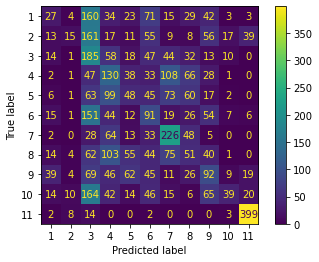

In [144]:
plot_confusion_matrix( log_model2, X_val2, y_val2)

# MODEL 2 - TRAINING METRICS

In [154]:
print(classification_report(y_train2, y_train_pred2))

              precision    recall  f1-score   support

           1       0.16      0.06      0.09      3770
           2       0.25      0.03      0.05      3821
           3       0.15      0.38      0.21      3841
           4       0.19      0.27      0.23      3800
           5       0.19      0.13      0.16      3850
           6       0.15      0.18      0.16      3864
           7       0.39      0.55      0.45      3828
           8       0.16      0.13      0.14      3826
           9       0.19      0.18      0.19      3853
          10       0.44      0.09      0.15      3841
          11       0.82      0.94      0.88      3832

    accuracy                           0.27     42126
   macro avg       0.28      0.27      0.25     42126
weighted avg       0.28      0.27      0.25     42126



# MODEL 2 - VALIDATION METRICS

In [145]:
print(classification_report(y_val2, y_val_pred2))

              precision    recall  f1-score   support

           1       0.18      0.07      0.10       411
           2       0.31      0.04      0.07       401
           3       0.17      0.44      0.24       422
           4       0.20      0.29      0.24       454
           5       0.16      0.12      0.14       414
           6       0.18      0.21      0.19       426
           7       0.38      0.54      0.45       419
           8       0.14      0.11      0.13       449
           9       0.22      0.22      0.22       422
          10       0.42      0.09      0.15       435
          11       0.82      0.93      0.87       428

    accuracy                           0.28      4681
   macro avg       0.29      0.28      0.25      4681
weighted avg       0.29      0.28      0.25      4681



# TEST DATA PREDICTIONS USING THE BEST MODEL

## Since Model 1 gave better validation accuracy, we are using model 1 for test data prediction

In [149]:
y_test = log_model.predict(X_test)

In [150]:
test_data['class'] = y_test

# EXPORTING PREDICTION TO CSV FILE

In [151]:
test_data.to_csv('ME18B149_Karthik_predictions.csv')